Photoperiod, or the duration of daylight hours, plays a crucial role in plant development, primarily influencing the transition from vegetative growth to reproductive stages, such as flowering. This adaptation ensures that plants produce seeds under optimal environmental conditions, enhancing species survival. Flowering induction varies by species: long-day plants like barley and wheat flower with increasing daylight, while short-day plants such as cotton, rice, and chrysanthemums require shorter days. Contrary to early beliefs, it's the length of uninterrupted darkness, not daylight, that primarily regulates these developmental changes. Thus, short-day plants are effectively long-night plants, and vice versa.

In agriculture, understanding photoperiodism and knowing the specific light requirements of crops can guide planting schedules and optimize growth conditions. Additionally, the influence of photoperiodism extends to animals, affecting behaviors such as migration, hibernation, and mating cycles. The predictability of photoperiods based on Earth's tilt and orbit allows for accurate determination of daylight hours, though actual daylight exposure can vary with local weather conditions.

In this exercise we will implement a routine to compute photoperiod based on the day of the year and the geographic latitude.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


## Define photoperiod function

For this type of applications is convenient to have a function that we can invoke to estimate the daylight hours for any latitude and day of the year. Since we are going to use the Numpy module, we could potentially pass multiple days of the year and estimate the photoperiod along the year for a single location.

In [4]:
# Define function
def photoperiod(phi, doy, verbose=False):
    """
    Function to compute photoperiod or daylight hours. This function is not accurate
    near polar regions.
    
    Parameters:
    phi(integer, float): Latitude in decimal degrees. Northern hemisphere is positive.
    doy(integer): Day of the year (days since January 1)

    Returns:
    float: photoperiod or daylight hours.
    
    References:
    Keisling, T.C., 1982. Calculation of the Length of Day 1. Agronomy Journal, 74(4), pp.758-759.
    """
    
    # Convert latitude to radians
    phi = np.radians(phi)
    
    # Angle of the sun below the horizon. Civil twilight is -4.76 degrees.
    light_intensity = 2.206 * 10**-3
    B = -4.76 - 1.03 * np.log(light_intensity) # Eq. [5].

    # Zenithal distance of the sun in degrees
    alpha = np.radians(90 + B) # Eq. [6]. Value at sunrise and sunset.
    
    # Mean anomaly of the sun. It is a convenient uniform measure of 
    # how far around its orbit a body has progressed since pericenter.
    M = 0.9856*doy - 3.251 # Eq. [4].
    
    # Declination of sun in degrees
    lmd = M + 1.916*np.sin(np.radians(M)) + 0.020*np.sin(np.radians(2*M)) + 282.565 # Eq. [3]. Lambda
    C = np.sin(np.radians(23.44)) # 23.44 degrees is the orbital plane of Earth around the Sun
    delta = np.arcsin(C*np.sin(np.radians(lmd))) # Eq. [2].

    # Calculate daylength in hours, defining sec(x) = 1/cos(x)
    P = 2/15 * np.degrees( np.arccos( np.cos(alpha) * (1/np.cos(phi)) * (1/np.cos(delta)) - np.tan(phi) * np.tan(delta) ) ) # Eq. [1].

    # Print results in order for each computation to match example in paper
    if verbose:
        print('Input latitude =', np.degrees(phi))
        print('[Eq 5] B =', B)
        print('[Eq 6] alpha =', np.degrees(alpha))
        print('[Eq 4] M =', M[0])
        print('[Eq 3] Lambda =', lmd[0])
        print('[Eq 2] delta=', np.degrees(delta[0]))
        print('[Eq 1] Daylength =', P[0])
    
    return P


## Example 1: Single latitude and single DOY

Now that we have the function ready, we can compute the daylight hours for a specific latitude and day of the year. To test the code we will use the example provided in the manuscript by Keisling, 1982.

In [6]:
# Invoke function with scalars
phi = 33.4 # Latitude
doy = np.array([201]) # Day of the year.

# Calculate photoperiod
P = photoperiod(phi,doy,verbose=True)
print('Photoperiod: ' + str(np.round(P[0],2)) + ' hours/day')


Input latitude = 33.4
[Eq 5] B = 1.5400715888953513
[Eq 6] alpha = 91.54007158889536
[Eq 4] M = 194.8546
[Eq 3] Lambda = 476.93831283687416
[Eq 2] delta= 20.770548026002125
[Eq 1] Daylength = 14.203998218048154
Photoperiod: 14.2 hours/day


## Example 2: Single latitude for a range of DOY


In [8]:
# Estiamte photperiod for single latitude and the entire year
phi = 33.4
doy = np.arange(1,365)
P = photoperiod(phi,doy)


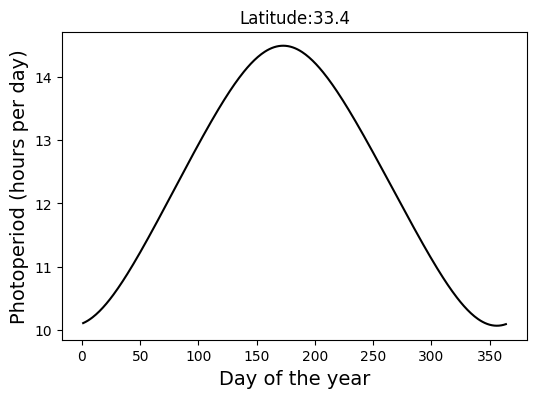

In [17]:
# Create figure of single Lat for the whole year
plt.figure(figsize=(6,4))
plt.plot(doy, P, color='k')
plt.title('Latitude:' + str(phi))
plt.xlabel('Day of the year', size=14)
plt.ylabel('Photoperiod (hours per day)', size=14)
plt.show()


## Example 3: Single DOY for a range of latitudes

In [11]:
# Estiamte photperiod for single latitude and the entire year
lats = np.linspace(0,40)
P_doy1 = photoperiod(lats, 1)
P_doy180 = photoperiod(lats, 180)

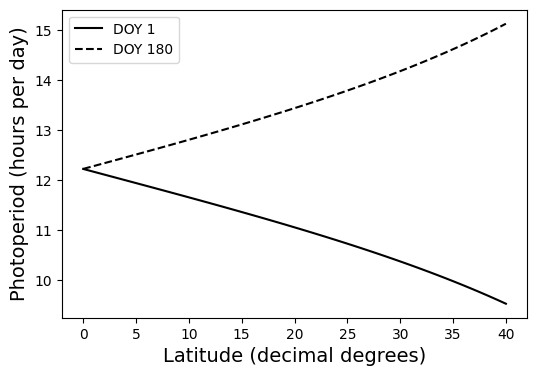

In [19]:
# Create figure for single day of the year for a range of latitudes
plt.figure(figsize=(6,4))
plt.plot(lats,P_doy1, color='k', label='DOY 1')
plt.plot(lats,P_doy180, color='k', linestyle='--', label='DOY 180')
plt.xlabel('Latitude (decimal degrees)', size=14)
plt.ylabel('Photoperiod (hours per day)', size=14)
plt.legend()
plt.show()

## References

Keisling, T.C., 1982. Calculation of the Length of Day 1. Agronomy Journal, 74(4), pp.758-759.